<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/practice8_1_Convolution_Neural_Network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x,y), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

9 == Ankle boot


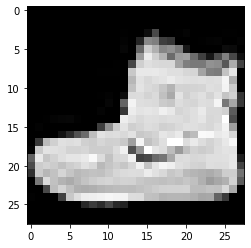

In [5]:
index=0
print(str(y[index]) + ' == ' + str(class_names[y[index]]))
img = x[index]
plt.imshow(img, cmap='gray')

In [6]:
#형변환
#normalize
#one-hot encoding
#reshape

In [7]:
from tensorflow.keras.utils import to_categorical
import numpy as np

In [8]:
#1) 형변환
x = x.astype('float32')
x_test = x_test.astype('float32')
#2)normalize

x,x_test = x/255., x_test/255.

#3) one-hot encoding

y = to_categorical(y,10)
y_test = to_categorical(y_test,10)

In [9]:
x.shape

(60000, 28, 28)

In [10]:
#4)reshape
x= x.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [11]:
x.shape

(60000, 28, 28, 1)

In [12]:
#cnn규칙 : Conv(Maxpool) >> Flatten > Dense

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [17]:
def create_cnn():
  model = Sequential()
  model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
  model.add(MaxPooling2D())
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [19]:
model = create_cnn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [20]:
history= model.fit(x,y, epochs=5, validation_split=1/6)

Epoch 1/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6135 - accuracy: 0.7773 - val_loss: 0.4670 - val_accuracy: 0.8334
Epoch 2/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.4202 - accuracy: 0.8468 - val_loss: 0.3999 - val_accuracy: 0.8529
Epoch 3/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.3585 - accuracy: 0.8679 - val_loss: 0.3685 - val_accuracy: 0.8637
Epoch 4/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.3213 - accuracy: 0.8819 - val_loss: 0.3615 - val_accuracy: 0.8651
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.2932 - accuracy: 0.8922 - val_loss: 0.3153 - val_accuracy: 0.8855
